### Level 1

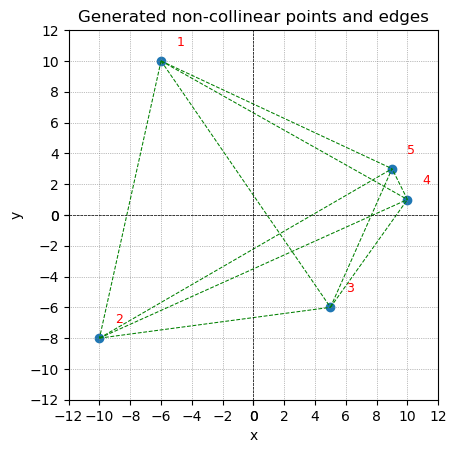

points:
x     y
-6    10
-10   -8
5     -6
10    1
9     3

circular sequence
4 5 3 1 2 
5 4 3 1 2 
5 4 1 3 2 
5 1 4 3 2 
1 5 4 3 2 
1 5 4 2 3 
1 5 2 4 3 
1 2 5 4 3 
1 2 5 3 4 
1 2 3 5 4 
2 1 3 5 4 

crossing number: 5


In [ ]:
import sys, math, random, itertools
import numpy as np
import matplotlib.pyplot as plt

def slope(p1, p2): # calculate slope between two points
  x1, y1 = p1
  x2, y2 = p2
  if x1 == x2:
    return -np.inf # vertical line
  else:
    return (y1 - y2) / (x1 - x2)

def init_points(n=4, min_coord=-10, max_coord=10):
  points = np.zeros((n, 2)) # store points
  ct = 0 # track number of points generated
  while ct < n:
    x, y = random.randint(min_coord, max_coord), random.randint(min_coord, max_coord) # randomly generate point
    new_slopes = np.array([slope((x, y), p) for p in points[:ct]]) # find slopes with existing points
    if (x, y) not in points and len(np.unique(new_slopes)) == len(new_slopes): # check if all slopes unique (otherwise, collinear triad exists)
      points[ct] = np.array([x, y]) # add point
      ct += 1
  return np.array(sorted(points, key=lambda p: p[0], reverse=True))

def generate_slopes(points):
  n = len(points)
  slopes = np.zeros((n, n))
  for i in range(n):
    for j in range(i, n):
      s = slope(points[i], points[j])
      slopes[i][j], slopes[j][i] = s, s
  return slopes

def generate_initial_seq_and_swap_seq(points, slopes):
  n = len(points)
  initial = [ind[0] + 1 for ind in sorted(enumerate(points), key=lambda p: p[1][0], reverse=True)] # begin facing south 
  swaps = sorted([(i + 1, j + 1) for i in range(n) for j in range(i)], key=lambda s: slopes[s[0] - 1][s[1] - 1]) # sort slopes to get swapping order
  return initial, swaps

def generate_circular_sequence(initial, swaps):
  n = len(initial)
  edg = np.zeros(n - 1) # store number of j-edges
  circ = np.zeros((n * (n - 1) // 2 + 1, n)) # store circular sequence
  seq = initial
  circ[0] = seq
  for ind, slope in enumerate(swaps): # iterate through swaps
    i, j = slope
    tmpsq = seq.copy() # swap positions
    edg[min(seq.index(i), seq.index(j))] += 1
    tmpsq[seq.index(i)], tmpsq[seq.index(j)] = j, i
    circ[ind + 1] = tmpsq
    seq = tmpsq
  return circ, edg

def calculate_cr(n, edg):
  return int(sum([edg[j] * ((n - 2) * (n - 3) / 4 - j * (n - j - 2)) for j in range(n - 1)]))

def print_points(points, min_coord, max_coord):
  print("points:")
  pad = 2 * max(len(str(int(min_coord))), len(str(int(max_coord))))
  print("x".ljust(pad) + "y")
  for p in points:
    x, y = p
    print(f"{int(x)}".ljust(pad) + f"{int(y)}")

def print_circular_sequence(n, circ):
  print("circular sequence")
  pad = 2 * len(str(n))
  for c in circ:
    print("".join([f"{int(i)}".ljust(pad) for i in c]))

def brute_force_circular_sequence(points):
  # https://math.stackexchange.com/questions/3176543/intersection-point-of-2-lines-defined-by-2-points-each

  n = len(points)

  cross = 0

  edg = itertools.combinations(np.arange(0, n, 1), 2)
  for pair in itertools.combinations(edg, 2):
    e1, e2 = pair
    if e1[0] not in e2 and e1[1] not in e2:
      n = (points[e1[1]][0] - points[e1[0]][0], points[e1[1]][1] - points[e1[0]][1])
      m = (points[e2[0]][0] - points[e2[1]][0], points[e2[0]][1] - points[e2[1]][1])
      p = (points[e2[0]][0] - points[e1[0]][0], points[e2[0]][1] - points[e1[0]][1])

      D = n[0] * m[1] - n[1] * m[0]
      if D != 0:
        Q = (m[1] * p[0] - m[0] * p[1], n[0] * p[1] - n[1] * p[0])

        t, s = Q[0] / D, Q[1] / D
        if 0 < t < 1 and 0 < s < 1:
          cross += 1

  return cross

n = 40
min_coord = -100
max_coord = 100
step = 10
ext = 10

points = init_points(n, min_coord, max_coord)
slopes = generate_slopes(points)
initial, swaps = generate_initial_seq_and_swap_seq(points, slopes)
circ, edg = generate_circular_sequence(initial, swaps)
cr = calculate_cr(n, edg)
cr_bruteforce = brute_force_circular_sequence(points)

plt.scatter(points[:,0], points[:,1]) # plot points
for ind, p in enumerate(points): # plot labels
  plt.text(p[0] + 1, p[1] + 1, f"{ind+1}", color='red', fontsize=9)
for edg in itertools.combinations(points, 2): # plot edges
  x1, y1 = edg[0]
  x2, y2 = edg[1]
  plt.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=0.75)

# visuals
plt.xlim(min_coord - ext, max_coord + ext)
plt.ylim(min_coord - ext, max_coord + ext)
ticks = np.concatenate((np.arange(0, min_coord - step - 1, -step), np.arange(0, max_coord + step + 1, step)))
plt.xticks(ticks)
plt.yticks(ticks)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.gca().set_aspect('equal') 
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.title('Generated non-collinear points and edges')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print_points(points, min_coord, max_coord)
print("")
print_circular_sequence(n, circ)
print("")
print("crossing number:", cr)
print("crossing number (brute force):", cr_bruteforce)

### Level 2

circular sequence
1 2 3 4 5 
1 2 4 3 5 
1 4 2 3 5 
1 4 3 2 5 
4 1 3 2 5 
4 1 3 5 2 
4 1 5 3 2 
4 5 1 3 2 
4 5 3 1 2 
4 5 3 2 1 
5 4 3 2 1 
(1, 2, 3)
0 4 1
(1, 2, 4)
0 5 2
(1, 2, 5)
0 6 3
(1, 3, 4)
1 7 2
(1, 3, 5)
1 8 3
(1, 4, 5)
2 9 3
(2, 3, 4)
4 7 5
(2, 3, 5)
4 8 6
(2, 4, 5)
5 9 6
(3, 4, 5)
7 9 8
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 107.49999999999999
              x: [ 1.800e+01  1.300e+01  9.000e+00  1.200e+01  8.000e+00
                   4.500e+00  1.000e+01  1.000e+00  1.100e+01  2.100e+01]
            nit: 4
          lower:  residual: [ 1.700e+01  1.200e+01  8.000e+00  1.100e+01
                              7.000e+00  3.500e+00  9.000e+00  0.000e+00
                              1.000e+01  2.000e+01]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  1.000e+01
                              0.0

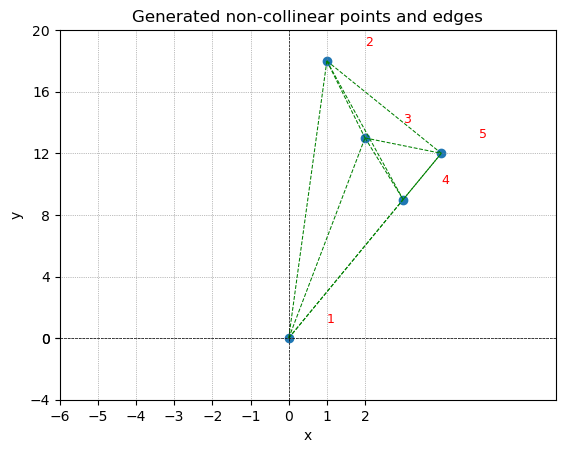

points:
x   y
0   0
1   18
2   12
3   8
4   11

# verify circular sequence
circular sequence
5 4 3 2 1 
5 4 2 3 1 
5 2 4 3 1 
5 2 3 4 1 
2 5 3 4 1 
2 3 5 4 1 
1 3 5 4 2 
3 1 5 4 2 
3 4 5 1 2 
3 4 1 5 2 
3 5 1 4 2 
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.  -5.  -4.5 -2. ]
 [ 0.  -5.   0.  -4.  -0.5]
 [ 0.  -4.5 -4.   0.   3. ]
 [ 0.  -2.  -0.5  3.   0. ]]


In [ ]:
import scipy as sp

def init_circular_sequence(n):
  circ = np.zeros((n * (n - 1) // 2 + 1, n))
  swaps = []
  seq = list(np.arange(1, n + 1, 1))
  circ[0] = seq
  ind = 0
  while len(swaps) < int(n * (n - 1) / 2):
    s = random.choice(list({tuple(sorted((x, y))) for x, y in zip(seq, seq[1:])}.difference(set(swaps))))
    if seq.index(s[0]) < seq.index(s[1]):
      tmpsq = seq.copy() # swap positions
      tmpsq[seq.index(s[0])], tmpsq[seq.index(s[1])] = s[1], s[0]
      circ[ind + 1] = tmpsq
      seq = tmpsq
      circ[ind + 1] = seq
      swaps.append(s)
      ind += 1
  return circ, swaps

def generate_points(n, swaps):
  points = np.zeros((n, 2)) # store points

  i = 0

  if i == 0:

    sworder = list(itertools.combinations(np.arange(1, n + 1, 1), 2))

    points[:,0] = -(np.arange(0, n, 1))

    sw = len(swaps)
    c = np.ones(sw)
    A_ub = np.zeros((sw - 1, sw))
    b_ub = -np.ones(sw - 1)
    A_eq = np.zeros((int(n * (n - 1) * (n - 2) / 6), sw))
    b_eq = np.zeros(int(n * (n - 1) * (n - 2) / 6))

    for ind, s in enumerate(swaps[:-1]):
      i, j = s
      i_, j_ = swaps[ind + 1]
      A_ub[ind][sworder.index((i, j))] = 1
      A_ub[ind][sworder.index((i_, j_))] = -1
      points[j - 1][1] -= (j - i) * (ind + 1)
    for ind, p in enumerate(itertools.combinations(np.arange(1, n + 1, 1), 3)):
      p1, p2, p3 = p
      A_eq[ind, sworder.index((p1, p2))] = p2 - p1
      A_eq[ind, sworder.index((p2, p3))] = p3 - p2
      A_eq[ind, sworder.index((p1, p3))] = p1 - p3
    
    m = sp.optimize.linprog(c, A_ub, b_ub, A_eq, b_eq)
    try:
      points[1:, 1] = -m["x"][:n - 1] * np.arange(1, n, 1)
    except:
      print("error with circular sequence")
      return np.zeros_like(points)
  
  elif i == 1:
   c = np.ones(n - 1)
   A_ub = np.zeros(())
  
  return points

n = 4
circ, swaps = init_circular_sequence(n)
print_circular_sequence(n, circ)
points = generate_points(n, swaps)
if points.any():
  min_coord = np.min(points)
  max_coord = np.max(points)
  step = 4
  ext = 2

  plt.scatter(points[:,0], points[:,1]) # plot points
  for ind, p in enumerate(points): # plot labels
    plt.text(p[0] + 1, p[1] + 1, f"{ind+1}", color='red', fontsize=9)
  for e in itertools.combinations(points, 2): # plot edges
    x1, y1 = e[0]
    x2, y2 = e[1]
    plt.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=0.75)

  # visuals
  plt.ylim(min_coord - ext, max_coord + ext)
  plt.xlim( -n - ext, ext)
  ticks = np.concatenate((np.arange(0, min_coord - ext, -step), np.arange(0, max_coord + ext, step)))
  plt.yticks(ticks)
  plt.xticks(np.arange(ext, -n - ext, -1))
  plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
  plt.axvline(0, color='black', linewidth=0.5, linestyle='--') 
  plt.grid(color='gray', linestyle=':', linewidth=0.5)
  plt.title('Generated non-collinear points and edges')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  print_points(points, min_coord, max_coord)

  slopes = generate_slopes(points)
  initial, swaps = generate_initial_seq_and_swap_seq(points, slopes)
  circ, edg = generate_circular_sequence(initial, swaps)
  print("")
  print("# verify circular sequence")
  print_circular_sequence(n, circ)